## Load needed modules and libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
import folium
import branca.colormap as cm
import seaborn; seaborn.set()
from itertools import chain, product

## Load Data

In [4]:
data = pd.read_csv('world-development-indicators/Indicators 2.csv')
data.shape

(5656458, 6)

## Explore Data

In [5]:
data.head()
## indicators = data['IndicatorName'].unique().tolist()
## indicators

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# Exploration of topic

### Filter 1
#### Picks years of choice
I chose years that are still relevant for today but reach 10 years into the past with sufficient data. I had to make adjustments in the process.

In [6]:
yearsFilter = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

### Filter 2
### Picks indicators of interest
These where picked by hand just from looking at the list of inducators. I am looking for two indicators, where, by common sense, one might have an impact on the other.

In [7]:
allindicatorsFilter = ['Physicians (per 1,000 people)','Renewable internal freshwater resources per capita (cubic meters)','Net migration','Maternal mortality ratio (national estimate, per 100,000 live births)','Prevalence of overweight, weight for height (% of children under 5)','Adjusted net enrolment rate, primary, both sexes (%)','Adjusted net enrolment rate, primary, female (%)','Adjusted net enrolment rate, primary, male (%)','Percentage of students in primary education who are female (%)','Percentage of students in secondary education who are female (%)','Percentage of students in secondary general education who are female (%)','Percentage of students in secondary vocational education who are female (%)','Adult literacy rate, population 15+ years, both sexes (%)','Adult literacy rate, population 15+ years, female (%)','Adult literacy rate, population 15+ years, male (%)','Prevalence of overweight, weight for height, female (% of children under 5)','Prevalence of overweight, weight for height, male (% of children under 5)','Prevalence of severe wasting, weight for height (% of children under 5)','Prevalence of severe wasting, weight for height, female (% of children under 5)','Prevalence of severe wasting, weight for height, male (% of children under 5)','Prevalence of stunting, height for age, female (% of children under 5)','Prevalence of stunting, height for age, male (% of children under 5)','Prevalence of underweight, weight for age, female (% of children under 5)','Prevalence of underweight, weight for age, male (% of children under 5)','Prevalence of wasting, weight for height, female (% of children under 5)','Prevalence of wasting, weight for height, male (% of children under 5)','Poverty headcount ratio at national poverty lines (% of population)','Rural poverty headcount ratio at national poverty lines (% of rural population)','Urban poverty headcount ratio at national poverty lines (% of urban population)','Immunization, DPT (% of children ages 12-23 months)','Labor force participation rate for ages 15-24, female (%) (national estimate)','Labor force participation rate for ages 15-24, male (%) (national estimate)','Labor force participation rate for ages 15-24, total (%) (national estimate)','Labor force participation rate, female (% of female population ages 15+) (national estimate)','Labor force participation rate, male (% of male population ages 15+) (national estimate)','Labor force participation rate, total (% of total population ages 15+) (national estimate)','Immunization, measles (% of children ages 12-23 months)','Newborns protected against tetanus (%)','Employment to population ratio, 15+, female (%) (national estimate)','Employment to population ratio, 15+, male (%) (national estimate)','Employment to population ratio, 15+, total (%) (national estimate)','Employment to population ratio, ages 15-24, female (%) (national estimate)','Employment to population ratio, ages 15-24, male (%) (national estimate)','Employment to population ratio, ages 15-24, total (%) (national estimate)','Unemployment, youth female (% of female labor force ages 15-24) (national estimate)','Unemployment, youth male (% of male labor force ages 15-24) (national estimate)','Unemployment, youth total (% of total labor force ages 15-24) (national estimate)'
'Ratio of female to male labor force participation rate (%) (national estimate)','Unemployment, total (% of total labor force) (national estimate)','Contributing family workers, female (% of females employed)','Contributing family workers, male (% of males employed)','Contributing family workers, total (% of total employed)','Employment in agriculture (% of total employment)','Employment in agriculture, female (% of female employment)','Employment in agriculture, male (% of male employment)','Employment in industry (% of total employment)','Employment in industry, female (% of female employment)','Employment in industry, male (% of male employment)','Employment in services (% of total employment)','Employment in services, female (% of female employment)','Employment in services, male (% of male employment)','Long-term unemployment (% of total unemployment)','Long-term unemployment, female (% of female unemployment)','Long-term unemployment, male (% of male unemployment)','Self-employed, female (% of females employed)','Self-employed, male (% of males employed)','Self-employed, total (% of total employed)','Unemployment, female (% of female labor force) (national estimate)','Unemployment, male (% of male labor force) (national estimate)','Income share held by fourth 20%','Income share held by highest 10%','Income share held by highest 20%','Income share held by lowest 10%','Income share held by lowest 20%','Income share held by second 20%','Income share held by third 20%','Government expenditure per tertiary student as % of GDP per capita (%)','Pregnant women receiving prenatal care (%)','Births attended by skilled health staff (% of total)','ARI treatment (% of children under 5 taken to a health provider)','Diarrhea treatment (% of children under 5 receiving oral rehydration and continued feeding)','Female headed households (% of households with a female head)','Low-birthweight babies (% of births)','Employment to population ratio, 15+, female (%) (modeled ILO estimate)','Employment to population ratio, 15+, male (%) (modeled ILO estimate)','Employment to population ratio, 15+, total (%) (modeled ILO estimate)','Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)','Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)','Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)','Prevalence of undernourishment (% of population)','Unemployment, female (% of female labor force)','Unemployment, male (% of male labor force)','Unemployment, total (% of total labor force)']

### Filtermesh 1
#### which indicators are available over all the years?
I also want to know, if there is a sufficient amount of data available for these indicators.

In [8]:
filterMesh1 = (data['IndicatorName'].isin(allindicatorsFilter)) & (data['Year'].isin(yearsFilter))

indicators_data = data.loc[filterMesh1]

indicator_counts = indicators_data['IndicatorName'].value_counts() # similar to unique in unix
indicator_counts[:20]

Immunization, DPT (% of children ages 12-23 months)                              2453
Immunization, measles (% of children ages 12-23 months)                          2453
Unemployment, female (% of female labor force)                                   2266
Employment to population ratio, 15+, female (%) (modeled ILO estimate)           2266
Unemployment, male (% of male labor force)                                       2266
Unemployment, total (% of total labor force)                                     2266
Employment to population ratio, 15+, male (%) (modeled ILO estimate)             2266
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)     2266
Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)    2266
Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)      2266
Employment to population ratio, 15+, total (%) (modeled ILO estimate)            2266
Percentage of students in primary education who are fe

# Data preparation for project

Without fully exploring the topic, I found that in many societies, women take responsibility for the health of their family and children. (eg.: Goodwin et al. 2005: Women and Family Health: The Role of Mothers in Promoting Family)
My central hypothesis in this matter is that women with higher education will (within their possibilities) support their infants to be vaccinated against measles.
From the above queries, I learned that there is a likely to be a sufficient amount of data available for women with higher education and the immunization of infants against measles.
Recently the increase in measles infections in many western urban areas has been reported.
My second hypothesis is that the effect of women's education on infants immunization will plateau or even reverse at some point.

In [9]:
#setup filter for the chosen indicators. The array will also be used for labeling later on. 
indicatorsFilter = ["Immunization, measles (% of children ages 12-23 months)","Percentage of students in secondary general education who are female (%)"]

In [10]:
#filter the source data by year and indicators
filterMesh2 = (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
twoIndicators_data = data.loc[filterMesh2]
len(twoIndicators_data)

4528

In [11]:
# counting the appearences of the chosen indicators within our timeframe.
# !! procedure needs optimization !! Takes a lot of system ressource.
dict_enough_counts= {}
for i in twoIndicators_data['CountryName']:
    dict_enough_counts.update(twoIndicators_data['CountryName'].value_counts())

df_IndicatorCounts = pd.Series(dict_enough_counts).to_frame('indi_counts')

In [12]:
counts_filter = df_IndicatorCounts['indi_counts'] > 21
#counts_filter

In [13]:
enough_data_countries = df_IndicatorCounts[counts_filter]
#enough_data_countries

I will handpick the countries and best-represented regions with the most promising data availability. This will influence the neutrality of that final data frame: We can only work with countries (and thus regions) that are willing and capable of providing data which might result in a slightly positive skew.

In [14]:
#a separation of countries and regions will be needed later on
country_filter = ['France', 'Cambodia', 'Peru', 'Hungary', 'Slovak Republic', 'Bulgaria', 'Belize', 'Kazakhstan', 'United Kingdom', 'Kyrgyz Republic', 'Bhutan', 'Lao PDR', 'South Africa', 'Chad', 'Burundi', 'Norway', 'Togo','Madagascar','Mali','El Salvador','Algeria','Finland','United States', 'Qatar', 'Australia', 'Morocco', 'Sweden', 'Latvia', 'Kuwait', 'Andorra', 'Spain', 'Cuba', 'Georgia', 'Niger', 'Portugal', 'Lebanon', 'Serbia', 'St. Lucia', 'Cabo Verde', 'Israel', 'Guinea', 'Moldova',  'Estonia', 'Armenia', 'Tunisia', 'Gambia, The', 'Mauritius', 'Belgium', 'Slovenia', 'Indonesia', 'Brunei Darussalam', 'Lithuania', 'Poland', 'Ukraine', 'Czech Republic', 'Eritrea', 'Lesotho','Austria', 'Chile', 'Burkina Faso', 'Iran, Islamic Rep.', 'Denmark', 'Netherlands', 'Germany', 'Vietnam', 'Syrian Arab Republic', 'Turkey', 'Mauritania', 'Nepal']
region_filter = ['North America', 'Caribbean small states', 'Arab World', 'Euro area', 'Latin America & Caribbean (all income levels)', 'World', 'Europe & Central Asia (all income levels)', 'East Asia & Pacific (all income levels)', 'European Union', 'Pacific island small states', 'Middle East & North Africa (all income levels)', 'Central Europe and the Baltics','Sub-Saharan Africa (all income levels)']
#first using both filters togather, to get a big master dataframe
geo_filter = country_filter + region_filter

## Filter by Country, Indicator and Year

Break down data to show the countrys that provide data about immunization AND higher education within that given timeframe.

In [15]:
filterMesh3 = (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter)) & ((data['CountryName'].isin(geo_filter))) 
master_data = data.loc[filterMesh3] 

## Set up the master dataframe

I want all my relevant data in one master dataframe
So, I will build two preliminary dataframes with the data for infant immunization and women education respectively and merge them in a second step.

In [16]:
#get immunization values
immuFilter = ["Immunization, measles (% of children ages 12-23 months)"]
immu = master_data['IndicatorName'].isin(immuFilter)

#get education values
eduFilter = ["Percentage of students in secondary general education who are female (%)"]
edu = master_data['IndicatorName'].isin(eduFilter)

# build two dfs for the data 
immu_data = master_data.loc[immu]
edu_data = master_data.loc[edu]

#clean up dataframes
immu_data = immu_data.drop(columns=['CountryCode', 'IndicatorName', 'IndicatorCode'])
immu_data = immu_data.rename(index=str, columns={"Value": "immunValue"})
edu_data = edu_data.drop(columns=['CountryCode', 'IndicatorName', 'IndicatorCode'])
edu_data = edu_data.rename(index=str, columns={"Value": "eduValue"})

#merge the two dataframes into one master dataframe
immu_edu = immu_data.merge(edu_data, on=['CountryName','Year'], how='left', sort=False)

#As (I believe in the last step) the year got converted to a float, I will downcast it to integer
immu_edu = immu_edu.astype({"Year" : int})

print(immu_edu.shape)

(902, 4)


Check for missing values:

In [17]:
immu_edu.isnull().values.any()

False

I need multiindexing to make the data efficiently accessible.

In [18]:
immu_edu = immu_edu.set_index(['CountryName', 'Year'])

Sort the dataframe

In [19]:
immu_edu.sort_index(inplace=True)

Now we have access to the dataframe in slices like this:

In [20]:
#Get a slice:
#immu_edu.loc[('World', 2003.0),:]

#Get only a specific column in that slice:
#immu_edu.loc[(country_filter, 2013),:].sort_values(["immunValue"], ascending=[False]).head(10)

#For selecting the index itself:
#immu_edu.index.get_level_values(0).unique()

In [21]:
# As we have the timeseries as well as regions and countries in one dataframe, 
# this will just give us a very a rough idea of the data for immunization. 
immu_edu['immunValue'].describe()

count    902.000000
mean      88.616269
std       12.663687
min       16.000000
25%       85.000000
50%       93.342414
75%       97.000000
max       99.000000
Name: immunValue, dtype: float64

In [22]:
#covariance of immunisation and education values in regions and countries 
#for i in country_filter:
for i in region_filter:
    print(i)
    print(immu_edu.loc[i, ].cov())
    print()

North America
            immunValue  eduValue
immunValue    0.565419 -0.014598
eduValue     -0.014598  0.032793

Caribbean small states
            immunValue  eduValue
immunValue    9.192514  0.252429
eduValue      0.252429  0.076959

Arab World
            immunValue  eduValue
immunValue    4.194547  0.327767
eduValue      0.327767  0.063321

Euro area
            immunValue  eduValue
immunValue    0.970850  0.043566
eduValue      0.043566  0.049894

Latin America & Caribbean (all income levels)
            immunValue  eduValue
immunValue    1.055363  0.101136
eduValue      0.101136  0.046347

World
            immunValue  eduValue
immunValue   15.034997  1.186672
eduValue      1.186672  0.101118

Europe & Central Asia (all income levels)
            immunValue  eduValue
immunValue    2.128228  0.070074
eduValue      0.070074  0.007171

East Asia & Pacific (all income levels)
            immunValue  eduValue
immunValue   12.399028  1.241276
eduValue      1.241276  0.132334

European

In [23]:
#corellation of immunisation and education values in regions and countries
#for i in country_filter:
for i in region_filter:
    print(i)
    print(immu_edu.loc[i, ].corr())
    print()

North America
            immunValue  eduValue
immunValue    1.000000 -0.107207
eduValue     -0.107207  1.000000

Caribbean small states
            immunValue  eduValue
immunValue    1.000000  0.300118
eduValue      0.300118  1.000000

Arab World
            immunValue  eduValue
immunValue    1.000000  0.635986
eduValue      0.635986  1.000000

Euro area
            immunValue  eduValue
immunValue    1.000000  0.197947
eduValue      0.197947  1.000000

Latin America & Caribbean (all income levels)
            immunValue  eduValue
immunValue    1.000000  0.457291
eduValue      0.457291  1.000000

World
            immunValue  eduValue
immunValue     1.00000   0.96242
eduValue       0.96242   1.00000

Europe & Central Asia (all income levels)
            immunValue  eduValue
immunValue     1.00000   0.56722
eduValue       0.56722   1.00000

East Asia & Pacific (all income levels)
            immunValue  eduValue
immunValue    1.000000  0.969035
eduValue      0.969035  1.000000

European

The correlation matrix for each region shows that: ...

a. worldwide, higher education for women has a strong correlation with the immunization rate of infants

b. breaking the correlation matrix down to regions of the world, the picture is more complex. Especially North America, Central Europe and the Euro Area show either weak correlation or even a weak negative correlation.

c. breaking it further down to countries, we find very strong correlation in some developing countries but also negative corellation in some other countries.

# The world in 2003 and 2013

In [24]:
country_geo = 'world-development-indicators/geo/world-countries.json'

State of immunization efforts in 2003 and 2013 worldwide. For this visualization all available data for the given year from the database was used as it is just supposed give an impression of as many countries as possible. Even if no consistent data over 10 years for the specific country is available.

All available countries in 2003 and 2013:

In [25]:
data
hist_indicator = 'Immunization, measles (% of children ages 12-23 months)'
hist_year_start = 2003
hist_year_end = 2013

mask1 = data['IndicatorName'].isin(immuFilter) 
mask2 = data['Year'].isin([hist_year_start])
mask3 = data['Year'].isin([hist_year_end])

In [26]:
# apply  mask for 2003
stage_start = data[mask1 & mask2]
stage_start.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3631331,Arab World,ARB,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2003,81.600573
3631759,Caribbean small states,CSS,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2003,83.431858
3632244,Central Europe and the Baltics,CEB,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2003,97.116470
3632785,East Asia & Pacific (all income levels),EAS,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2003,84.513701
3633332,East Asia & Pacific (developing only),EAP,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2003,83.602404


In [27]:
plot_data_start = stage_start[['CountryCode','Value']]
plot_data_start.head()

,CountryCode,Value
3631331,ARB,81.600573
3631759,CSS,83.431858
3632244,CEB,97.116470
3632785,EAS,84.513701
3633332,EAP,83.602404


In [28]:
map_s = folium.Map(location=[20, 10], width=800, height=500, zoom_start=2, min_zoom=2, max_zoom=2, no_touch=True, scrollWheelZoom=False)

In [29]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map_s.choropleth(geo_data=country_geo, data=plot_data_start,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             bins= [1,75, 95, 100],
             nan_fill_color='lightgrey',
             fill_color= 'YlOrRd_r', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)

/Users/vjmayr/anaconda3/lib/python3.7/site-packages/folium-0.9.1+14.gf05f3ce-py3.7.egg/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [30]:
map_s

In [31]:
map_s.save("map2003.html")

In [32]:
# apply  mask for 2013
stage_end = data[mask1 & mask3]
plot_data_end = stage_end[['CountryCode','Value']]
plot_data_end.head()

,CountryCode,Value
5377625,ARB,85.319540
5378088,CSS,94.271429
5378569,CEB,96.429202
5379098,EAS,94.755903
5379689,EAP,94.692742


In [33]:
map_e = folium.Map(location=[20, 10], width=800, height=500, zoom_start=2, min_zoom=2, max_zoom=2, no_touch=True, scrollWheelZoom=False)

In [34]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
map_e.choropleth(geo_data=country_geo, data=plot_data_end,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             bins= [1,75, 95, 100],
             nan_fill_color='lightgrey',
             fill_color='YlOrRd_r', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)

In [35]:
map_e

In [36]:
map_e.save("map2013.html")

The resulting maps do not clearly communicate the change that has happened. Therefore I calculate the change in immunization rate and show it on a map.

In [37]:
plot_data_change = plot_data_end.set_index('CountryCode') - plot_data_start.set_index('CountryCode')
plot_data_change.reset_index(level=0, inplace=True)
#print(plot_data_change.head())

In [38]:
map_c = folium.Map(location=[20, 10], 
                   width=800, height=500, 
                   zoom_start=2, 
                   min_zoom=2, 
                   max_zoom=2, 
                   no_touch=True, 
                   scrollWheelZoom=False
                  )

In [39]:
map_c.choropleth(geo_data=country_geo, 
                 data=plot_data_change,
                 columns=['CountryCode', 'Value'],
                 key_on='feature.id',
                 bins= [-50,-10,-5,0,50],
                 nan_fill_color='lightgrey',
                 fill_color='YlOrRd_r', fill_opacity=0.7, line_opacity=0.2,
                 legend_name=hist_indicator)

In [40]:
map_c

In [41]:
map_c.save("map_of_change.html")

### 2003 to 2013: 10 years of improvement?

Build an overview of the immunization rate and women in higher education rate for countries and regions in 2003 and 2013.
For orientation a target of 95% immunization rate is displayed.
Trendlines have been added to show the appaerent correlation of infant immunization rate and higher education rate for women. 

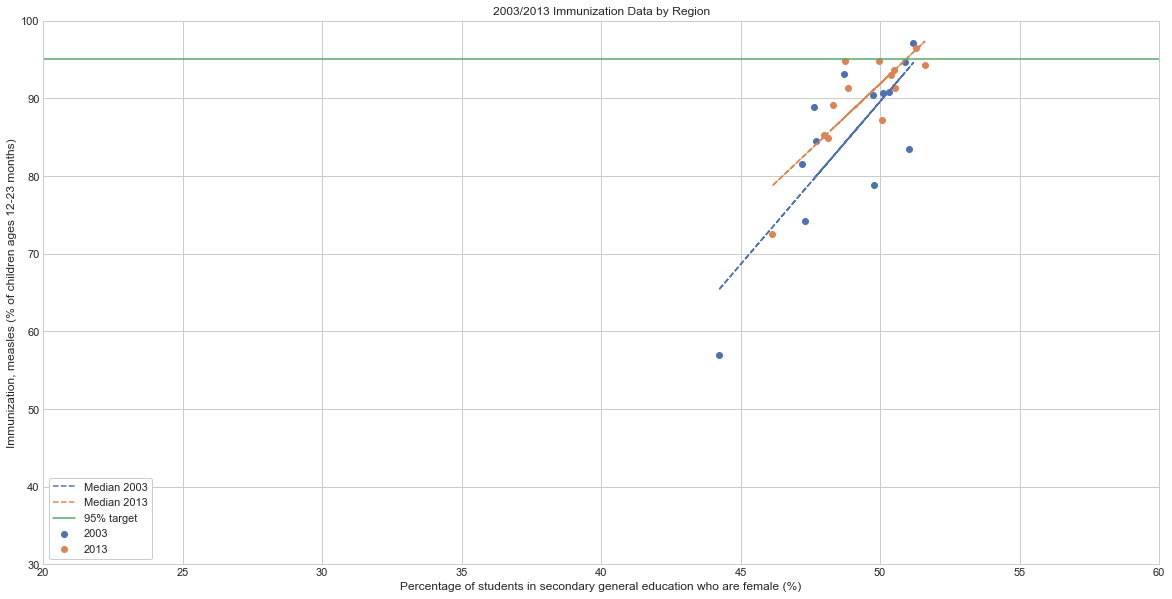

In [42]:
plt.figure(figsize = (20, 10))

plt.style.use('seaborn-whitegrid')
plt.title("2003/2013 Immunization Data by Region")
plt.xlim(20,60)
plt.ylim(30,100)
plt.xlabel(indicatorsFilter[1])
plt.ylabel(indicatorsFilter[0])

X = immu_edu.loc[(region_filter, 2003),:]['eduValue']
Z = immu_edu.loc[(region_filter, 2013),:]['eduValue']
Y = immu_edu.loc[(region_filter, 2003),:]['immunValue']
W = immu_edu.loc[(region_filter, 2013),:]['immunValue']
    
plt.scatter(X, Y, label='2003')
plt.scatter(Z, W, label='2013')

q = np.polyfit(X, Y, 1)
p = np.poly1d(q)
plt.plot(X,p(X),"--", label="Median 2003")

r = np.polyfit(Z, W, 1)
s = np.poly1d(r)
plt.plot(Z,s(Z),"--", label="Median 2013") 

#plt.text(47,55, "Sub Saharan Africa")
#plt.annotate('Test', xy=(50,50), xytext=(55,55),arrowprops=dict(facecolor='black', shrink=0.05))

#plt.arrow(44,56,2,16, shape='full', color='green')

#plt.axhline(y=95, color='g', linestyle='-', label='95% target')

plt.axhline(y=95, color='g', linestyle='-', label='95% target')

plt.legend(framealpha = 1, frameon = True)

plt.savefig('immu_edu_region.png')

In 2003 there was a wide spread in both factors. The lowest immunization rate is at 56.94% (Sub Saharan Africa) followed by South Asia at 61.79%. The smallest female share in higher education is at 43.71% (South East Asia) followed by Sub Saharan Africa with 44.20%.
At the same time, Central Europe and the Baltics had an immunization rate of 97.12% (followed by Latin America and the Carribean: 94.67%) and a female higher-education share of 51.19% (followed by the Carribean Small States: 51.05%).

In 2013 the last and top spots where held by the same regions in the same order. However, the low end improved both factors drastically. The immunization rate in South Asia increased by more than 36 percentage points while higher education rate for women rose increased by more than two percentage points.
At the top spots in 2013, the share of Central European and Carribean women in higher education rose slightly (51.60%, 51.27%). The highest immunization rate is still found in Central Europe with 96,43% (roughly 0.7% below 2003). The Caribbean Small States now holds the second spot with 94,27% as Central Europe reported declining immunization rates at 91.36% in 2013, a decline of ca. 3.3%.

Over the ten years between 2003 and 2013, many regions with initially low standards in our context have seen a positive development and decreased the gap to the more advanced countries. In 2013 4 Regions come near the 95% coverage for the first dose of measles immunization. At the same time, there has been a negative trend in some developed areas leading to slightly worsened numbers.

A 95% immunization coverage for both doses are the target for herd-protection against measles. Barely reaching 95% for the first dose almost certainly means that the coverage for the second dose will fall short of achieving 95% coverage.

### 2013:

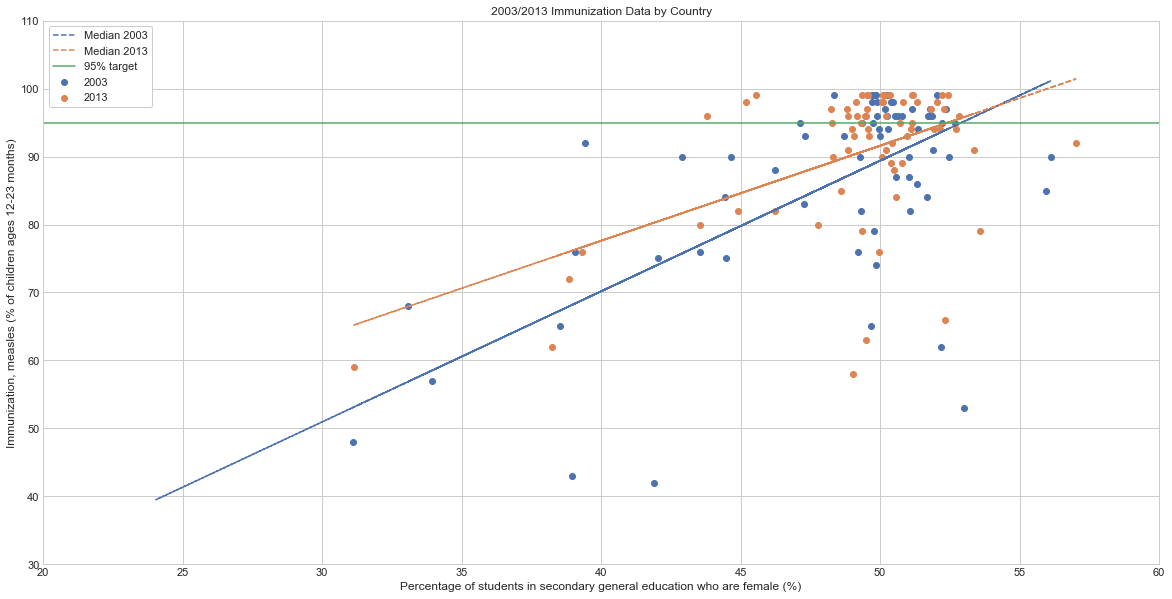

In [43]:
plt.figure(figsize = (20, 10))
plt.style.use('seaborn-whitegrid')
plt.title("2003/2013 Immunization Data by Country")

plt.xlim(20,60)
plt.ylim(30,110)

plt.xlabel(indicatorsFilter[1])
plt.ylabel(indicatorsFilter[0])

X = immu_edu.loc[(country_filter, 2003),:]['eduValue']
Z = immu_edu.loc[(country_filter, 2013),:]['eduValue']
Y = immu_edu.loc[(country_filter, 2003),:]['immunValue']
W = immu_edu.loc[(country_filter, 2013),:]['immunValue']
  
plt.scatter(X, Y, label = '2003')
plt.scatter(Z, W, label = '2013')

q = np.polyfit(X, Y, 1)
p = np.poly1d(q)
plt.plot(X,p(X),"--", label="Median 2003")

r = np.polyfit(Z, W, 1)
s = np.poly1d(r)
plt.plot(Z,s(Z),"--", label="Median 2013")

#plt.text(24.5,23, "Chad")
#plt.annotate('low', xy=(24.5, 23), xytext=(34,24), arrowprops=dict(facecolor='black', shrink=0.05))

plt.axhline(y=95, color='g', linestyle='-', label='95% target')

plt.savefig('immu_edu_country.png')

plt.legend(framealpha = 1, frameon = True)

plt.savefig('immu_edu_country.png')

In the country specific data we see a similar pattern. As expected, the non-summarized data holds some extremes.

Education and immunization rates are wide spread in 2003. The lowest infant immunization (23%) and female education (24.04%) rates are recorded for Chad.

The inprovement that was visible in the summarized data for regions is not as prevalend in the country data, as some outliers cause closer trendlines. However, we still see a drastic improvement at the bottom end.

## Winners and Loosers
1. Which countries have worse conditions in 2013 than in 2003? 
2. Which countries had the biggest increase in immunization levels?
3. How do immunization and education correlate for these countries?

In [44]:
print('Immunization 2003 Top 5')
print(immu_edu.loc[(country_filter, 2003),:]['immunValue'].sort_values(ascending=False).head(5))
print()
print('Immunization 2003 Last 5')
print(immu_edu.loc[(country_filter, 2003),:]['immunValue'].sort_values(ascending=False).tail(5))
print()
print('Education 2003 Top 5')
print(immu_edu.loc[(country_filter, 2003),:]['eduValue'].sort_values(ascending=False).head(5))
print()
print('Education 2003 Last 5')
print(immu_edu.loc[(country_filter, 2003),:]['eduValue'].sort_values(ascending=False).tail(5))
print()
print('Immunization 2013 Top 5')
print(immu_edu.loc[(country_filter, 2013),:]['immunValue'].sort_values(ascending=False).head(5))
print()
print('Immunization 2013 Last 5')
print(immu_edu.loc[(country_filter, 2013),:]['immunValue'].sort_values(ascending=False).tail(5))
print()
print('Education 2013 Top 5')
print(immu_edu.loc[(country_filter, 2013),:]['eduValue'].sort_values(ascending=False).head(5))
print()
print('Education 2013 Last 5')
print(immu_edu.loc[(country_filter, 2013),:]['eduValue'].sort_values(ascending=False).tail(5))

Immunization 2003 Top 5
CountryName         Year
Kyrgyz Republic     2003    99.0
Kazakhstan          2003    99.0
Cuba                2003    99.0
Slovak Republic     2003    99.0
Iran, Islamic Rep.  2003    99.0
Name: immunValue, dtype: float64

Immunization 2003 Last 5
CountryName  Year
Lebanon      2003    53.0
Guinea       2003    48.0
Niger        2003    43.0
Lao PDR      2003    42.0
Chad         2003    23.0
Name: immunValue, dtype: float64

Education 2003 Top 5
CountryName  Year
St. Lucia    2003    56.136471
Lesotho      2003    55.933529
Lebanon      2003    53.002480
Sweden       2003    52.692322
Cabo Verde   2003    52.456680
Name: eduValue, dtype: float64

Education 2003 Last 5
CountryName  Year
Cambodia     2003    38.509331
Mali         2003    33.938801
Togo         2003    33.079700
Guinea       2003    31.089149
Chad         2003    24.044270
Name: eduValue, dtype: float64

Immunization 2013 Top 5
CountryName      Year
Kyrgyz Republic  2013    99.0
Qatar           

Are there recognizable patterns for countries with negative development in immunization? Can we connect it to lower education participation of women?

In [45]:
# In order to get a sortable overview, I build a new dataframe that holds the changes in
# infant measel immunization rate and female higher education share as well as the correlation of those two n

dict_immu_changes = {}
dict_edu_changes = {}
dict_corr = {}
for i in country_filter:
    abs_immu_change = immu_edu.loc[(i, 2013.0),:]['immunValue'] - immu_edu.loc[(i, 2003.0),:]['immunValue']
    abs_edu_change = immu_edu.loc[(i, 2013.0),:]['eduValue'] - immu_edu.loc[(i, 2003.0),:]['eduValue']
    dict_immu_changes.update({i : abs_immu_change})
    dict_edu_changes.update({i : abs_edu_change})
    o = immu_edu.loc[(i, ),:]['immunValue']
    p = immu_edu.loc[(i, ),:]['eduValue']   
    q = np.corrcoef(o , p)[1 , 0]
    dict_corr.update({i : q})
df_immu_changes = pd.Series(dict_immu_changes).to_frame('immuChange')
df_edu_changes = pd.Series(dict_edu_changes).to_frame('eduChange')
df_corr = pd.Series(dict_corr).to_frame('corr') 
df_immu_edu_changes = df_immu_changes.join(df_edu_changes, how='outer')
df_immu_edu_changes_corr = df_immu_edu_changes.join(df_corr, how='outer')
print(df_immu_edu_changes_corr.sort_values(["immuChange"], ascending=[False]).head(20))
print(df_immu_edu_changes_corr.sort_values(["immuChange"], ascending=[False]).tail(20))

                immuChange  eduChange      corr
Lao PDR               40.0   4.338711  0.957719
Chad                  36.0   7.094910  0.774178
Niger                 33.0   0.345322  0.137423
Lebanon               26.0   0.577190  0.937754
Cambodia              25.0   9.793758  0.902207
Turkey                23.0   4.672489  0.797808
Mali                  23.0   9.610619  0.892863
Burundi               22.0   1.660252  0.296421
Georgia               21.0  -0.997032 -0.194677
Guinea                14.0   7.145611  0.920095
Belgium               14.0   1.773888  0.157647
Nepal                 13.0   8.473900  0.783755
United Kingdom        11.0   0.297199 -0.245326
Algeria               11.0  -0.547482 -0.542691
Indonesia             10.0   0.737129  0.715565
St. Lucia              9.0  -5.791389 -0.509861
Morocco                9.0   0.915592  0.585773
Mauritius              8.0   0.330730  0.478223
Norway                 7.0  -0.342888 -0.268668
Lesotho                7.0   1.079872  0

/Users/vjmayr/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/vjmayr/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Many countries with decreasing infant immunization also have a decrease in the women's share of higher education. The only exeptions are the United States, Mauritania, Syria, Peru, Austria and the Slovak Republic. For these countries the two factors show a very low positive or very low negative correlation. Only Syria and the Slovak Republic show a weak negative correlation. On the other side, Georgia shows a very strong increase in immunization and a negative development in the famale share of higher education while the correlation of both factors is very low.

In [46]:
print(df_immu_edu_changes_corr[df_immu_edu_changes_corr['corr'] > 0.7].sort_values(["immuChange"], ascending=[False]).head(10))

             immuChange  eduChange      corr
Lao PDR            40.0   4.338711  0.957719
Chad               36.0   7.094910  0.774178
Lebanon            26.0   0.577190  0.937754
Cambodia           25.0   9.793758  0.902207
Mali               23.0   9.610619  0.892863
Turkey             23.0   4.672489  0.797808
Guinea             14.0   7.145611  0.920095
Nepal              13.0   8.473900  0.783755
Indonesia          10.0   0.737129  0.715565
El Salvador         4.0  -0.261929  0.703130


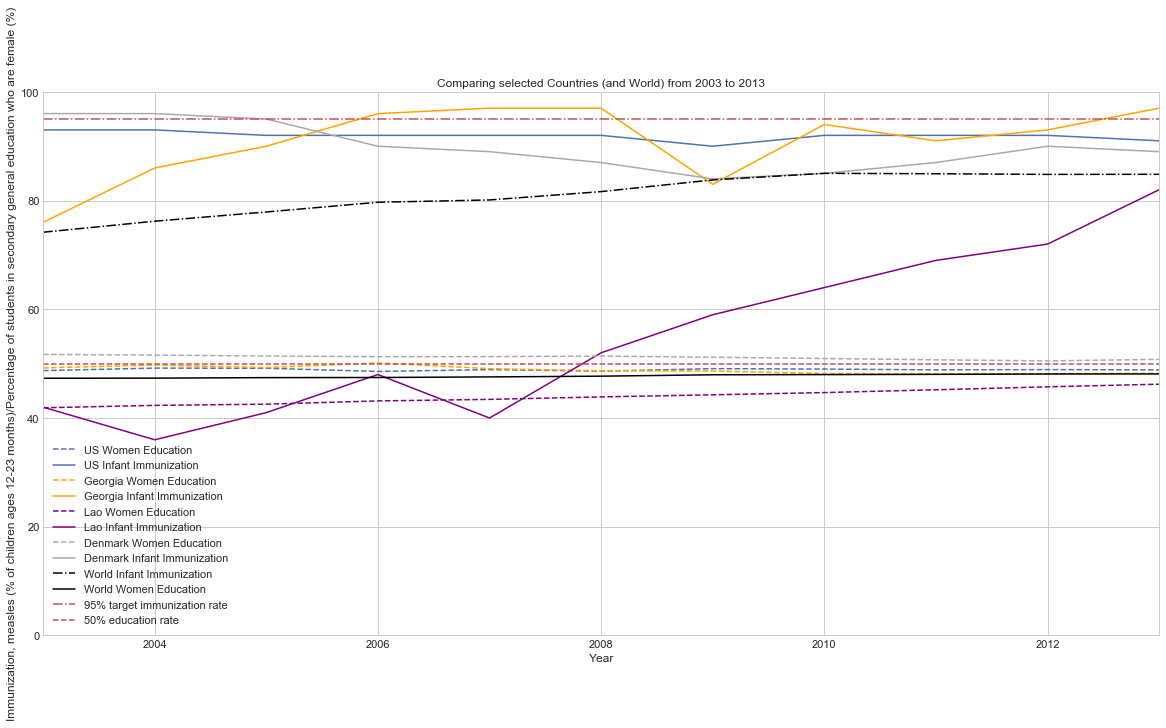

In [48]:
plt.figure(figsize = (20, 10))
plt.style.use('seaborn-whitegrid')
plt.title("Comparing selected Countries (and World) from 2003 to 2013")

plt.xlim(2003,2013)
plt.ylim(0,100)

plt.xlabel("Year")
plt.ylabel(indicatorsFilter[0] + "/" + indicatorsFilter[1])

#Put the years from the index in a list and use the for the X Axis.
x = immu_edu.index.get_level_values(1).unique().tolist()

z = immu_edu.loc[("United States", ),:]['eduValue']
y = immu_edu.loc[("United States", ),:]['immunValue']

f = immu_edu.loc[("Georgia", ),:]['eduValue']
g = immu_edu.loc[("Georgia", ),:]['immunValue']

l = immu_edu.loc[("Lao PDR", ),:]['eduValue']
m = immu_edu.loc[("Lao PDR", ),:]['immunValue']

q = immu_edu.loc[("Denmark", ),:]['eduValue']
p = immu_edu.loc[("Denmark", ),:]['immunValue']
 
o = immu_edu.loc[("World", ),:]['eduValue']
n = immu_edu.loc[("World", ),:]['immunValue']

plt.plot(x, z, label = 'US Women Education', color='b', linestyle='--')    
plt.plot(x, y, label = 'US Infant Immunization', color='b', linestyle='-')

plt.plot(x, f, label = 'Georgia Women Education', color='orange', linestyle='--')    
plt.plot(x, g, label = 'Georgia Infant Immunization', color='orange', linestyle='-')

plt.plot(x, l, label = 'Lao Women Education', color='purple', linestyle='--')
plt.plot(x, m, label = 'Lao Infant Immunization', color='purple', linestyle='-')

plt.plot(x, q, label = 'Denmark Women Education', color='darkgrey', linestyle='--')
plt.plot(x, p, label = 'Denmark Infant Immunization', color='darkgrey', linestyle='-')

plt.plot(x, n, label = 'World Infant Immunization', color='black', linestyle='-.')
plt.plot(x, o, label = 'World Women Education', color='black', linestyle='-')

plt.axhline(y=95, color='r', linestyle='-.', label='95% target immunization rate')
plt.axhline(y=50, color='r', linestyle='--', label='50% education rate')



plt.legend()
plt.savefig('immu_edu_examples.png')

## Interpretation and Outlook
Historically there is a strong correlation between the participation of women in higher education and the immunization rate of infants. However, that does not hold in all cases. Other factors like the support from aid organizations, centralized governments, religious believes or a general skepticism in widely accepted agendas can play a very important role for the immunization of infants without necessarily affecting the share of women in higher education (and vice versa).

We can not conclude that educating women will directly result in higher immunization rates. In a follow-up study, the slope of the immunization curve should be investigated to find troughs and tipping points that might point towards other influences (political change, aid programs, ...). Also, other factors like GDP should be integrated into the study.